# 교차 엔트로피 오차

- 데이터에서 학습한다 : 가중치 매개변수의 값을 데이터를 보고 자동으로 결정한다.
- 이번 장에서는 신경망 학습(데이터로부터 매개변수의 값을 정하는 방법)에 대해 알아보고 파이썬으로 MNIST 데이터셋의 손글씨 숫자를 학습하는 코드를 구현해보자

---

- 데이터 주도 학습
  - 신경망과 딥러닝은 기존 기계학습에서 사용하던 방법보다 사람의 개입을 더욱 배제할 수 있게 해주는 중요한 특성을 지녔다.
    - 구체적 예 > 가령 이미지에서 '5'라는 숫자를 인식하는 프로그램을 구현한다고 해보자. 주어진 데이터를 잘 활용해서 해결해야 한다. 이런 방법의 하나로서 이미지에서 특징을 추출하고 그 특징의 패턴을 기계학습 기술로 학습하는 방법이 있다. 여기서 말하는 특징은 입력 데이터(입력 이미지)에서 본질적인 데이터(중요 데이터)를 정확하게 추출할 수 있도록 설계된 변환기를 가리킨다. 이미지의 특징은 보통 벡터로 기술한다. 이미지 데이터를 벡터로 변환하고, 변환된 벡터를 가지고 지도 학습 방식의 대표 분류 기법인 SVM,KNN등으로 학습할 수 있다. 
    - 다만, 이미지를 벡터로 변환할 때 사용하는 특징은 여전히 사람이 설계한다. 
    - 즉, 특징과 기계학습을 활용한 접근에도 문제에 따라서는 사람이 적절한 특징을 생각해내야 하는 것이다.
    - 반면 신경망 방식은 사람이 개입하지 않는 블록 하나로 이루어진다. 
    - 신경망은 이미지를 있는 그대로 학습한다. 신경망은 이미지에 포함된 중요한 특징까지도 기계가 스스로 학습한다. 따라서 종단간 기계학습이라고 딥러닝을 부르기도 한다. 

- 신경망도 하나의 지표를 기준으로 최적의 매개변수 값을 탐색한다. 신경망 학습에서 사용하는 지표는 손실 함수라고도 한다. 이 손실 함수는 임의의 함수를 사용할 수도 있지만 일반적으로는 오차제곱합과 교차 엔트로피 오차를 사용한다.
- 오차 제곱합은 각 원소의 출력(추정 값)과 정답 레이블(참 값)의 차를 제곱한 후, 그 총합을 구한다. 파이썬으로 구현해보자

In [4]:
import numpy as np

def sum_squares_error(y,t):
    return 0.5 * np.sum((y-t)**2)

- 여기서 인수 y와 t는 넘파이 배열이다. 

In [5]:
t = [0,0,1,0,0,0,0,0,0,0]
y = [0.1,0.05,0.6,0,0.05,0.1,0,0.1,0,0]

sum_squares_error(np.array(y), np.array(t))

0.09750000000000003

In [6]:
sum(y)
# 해당 예는 정답도 2이고 예측도 2일 확률이 0.6으로 가장 높다고 했음

1.0

In [7]:
y = [0.1,0.05,0.1,0,0.05,0.1,0,0.6,0,0]
sum_squares_error(np.array(y),np.array(t))

0.5975

In [8]:
sum(y)
# 해당 예는 정답은 똑갑이 2이지만 예측은 6일 확률이 0.6으로 가장 높다고 했음

1.0

- 즉, 첫 번째 예의 손실 함수 쪽 출력이 작으며 정답 레이블과의 오차도 작은 것을 알 수 있다.
- 오차제곱합 기준으로는 첫 번째 추정 결과가 (오차가 더 작으니) 정답에 더 가까울 것으로 판단할 수 있다.

---

- 교차 엔트로피 오차
  - 실질적으로 정답일 때의 추정의 자연로그를 계산하는 식이 된다. 
  - 즉, 교차 엔트로피 오차는 정답일 때의 출력이 전체 값을 정하게 된다. 
  - 정답에 해당하는 출력이 커질수록 0에 다가가다가, 그 출력이 1일 때, 0이 된다.
  - 반대로 정답일 때의 출력이 작아질수록 오차는 커진다.

Text(0.5, 1.0, 'y=log(x)')

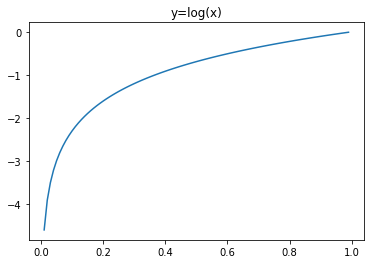

In [9]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

x=np.arange(0,1,0.01)
plt.plot(x,np.log(x))
plt.title('y=log(x)')

In [10]:
def cross_entropy_error(y,t):
    delta = 1e-7 # np.log 함수에 0을 입력하면 마이너스 무한대를 뜻하는 -inf가 되어 더 이상 계산할 수 없기에 아주 작은 값인 delta를 더해줌.
    return -np.sum( t*np.log(y+delta))

In [11]:
t = [0,0,1,0,0,0,0,0,0,0]
y = [0.1,0.05,0.6,0,0.05,0.1,0,0.1,0,0]
cross_entropy_error(np.array(y),np.array(t))

0.510825457099338

In [12]:
y = [0.1,0.05,0.1,0,0.05,0.6,0,0.1,0,0]
cross_entropy_error(np.array(y),np.array(t))

2.302584092994546

- 첫 번째 예는 정답일 때의 출력이 0.6인 경우로 이때의 교차 엔트로피 오차는 약 0.51이다.
- 다음은 정답일 때의 출력이 0.1인 경우로 이 때의 교차 엔트로피 오차는 무려 2.3이다. 
- ***즉, 결과(오차 값)가 더 작은 첫 번째 추정이 정답일 가능성이 높다고 판단한 것으로, 앞서 오차제곱합의 판단과 일치한다.***

---

- 지금까지는 데이터 하나에 대한 손실 함수만 생각했으니, 이제 훈련 데이터 모두에 대한 손실함수의 합을 구하는 방법에 대해 생각해보자
- 빅데이터 수준의 수백만, 수천만개의 수준에서는 데이터 일부를 추려 전체의 근사치로 이용할 수 있다. 
  - 이 일부를 미니배치라고 한다. 가령 60000장의 훈련 데이터 중에서 100장을 무작위로 뽑아 그 100장 만을 사용하여 학습하는 것이다. 이러한 학습을 미니배치 학습이라고 한다. 
  - 미니배치 학습을 구현하는 코드를 작성해보자

In [13]:
import sys, os
sys.path.append(os.pardir)
from dataset.mnist import load_mnist

(x_train,t_train),(x_test, t_test) = \
load_mnist(normalize=True, one_hot_label=True)

print(x_train.shape)
print(t_train.shape)

(60000, 784)
(60000, 10)


- 이 훈련 데이터에서 무작위로 10장만 빼내려면 어떻게 하면 될까.

In [15]:
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

```python
np.random.choice(60000,10)
```
- 의미 : 0이상 60000 미만의 수 중에서 무작위로 10개 골라낸다

- 이제 무작위로 선택한 이 인덱스를 사용해 미니배치를 뽑아내기만 하면 된다. 손실함수도 이 미니배치로 계산한다. 

---

- 미니배치 같은 배치 데이터를 지원하는 교차 엔트로피 오차는 어떻게 구현할까
- 아래 셀은 데이터가 하나인 경우와 데이터가 배치로 묶여 입력된 경우 모두를 처리할 수 있도록 구현한 것이다. 

In [19]:
def cross_entropy_error(y,t): # y는 신경망의 출력, t는 정답레이블
    if y.dim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
    
    batch_size = y.shape[0]
    return -np.sum( t * np.log(y + 1e-7)) / batch_size

- y(신경망의 출력)가 1차원이라면, 즉 데이터 하나당 교차 엔트로피 오차를 구하는 경우는 reshape함수로 데이터의 형상을 바꿔준다. 
- 정답 레이블이 원-핫 인코딩이 아니라 '2'나 '7'등의 숫자 레이블로 주어졌을 때의 교차 엔트로피 오차는 다음과 같이 구현할 수 있다.

In [21]:
def cross_entropy_error(y,t): # y는 신경망의 출력, t는 정답레이블
    if y.dim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
    
    batch_size = y.shape[0]
    return -np.sum( np.log(y[np.arange(batach_size),t] + 1e-7)) / batch_size

- 이 구현에서는 원-핫 인코딩일 때 t가 0인 원소는 교차 엔트로피 오차도 0이므로, 그 계산은 무시해도 좋다는 것이 핵심이다. 
- 다시 말하면 정답에 해당하는 신경망의 출력만으로 교차 엔트로피 오차를 계산할 수 있다. 

---